Загальні операції з TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import torch

# * Створення тензорів

tf_scalar = tf.constant(33)
print("Скаляр - ", tf_scalar)

tf_vector = tf.Variable([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
print("Вектор А - ", tf_vector)

tf_matrix_a = tf.constant([[10, 20],
                        [20, 10]])
print("Матриця А - ", tf_matrix_a)

ar_matrix_b = np.arange(30, 34, dtype=np.int32)
tf_matrix_b = tf.constant(ar_matrix_b, shape=(2, 2))
print("Матриця Б - ", tf_matrix_b)

tf_tensor_a = tf.constant([[[10, 20, 30],
                       [40, 50, 60]],
                      [[70, 80, 90],
                       [20, 50, 80]]])
print("Тензор А - ", tf_tensor_a)

tf_tensor_b = torch.randint(3, 10, (2, 2, 3))
print("Тензор Б - ", tf_tensor_b)


# * Операції з тензорами
sum_tensors = tf.add(tf_tensor_a, tf_tensor_b)
print("* Додавання: \n", sum_tensors, "\n")

dif_tensors = tf.subtract(tf_tensor_a, tf_tensor_b)
print("* Віднімання: \n", dif_tensors, "\n")

mul_tensors = tf.multiply(tf_tensor_a, tf_tensor_b)
print("* Множення: \n", mul_tensors, "\n")

div_tensors = tf.divide(tf_tensor_a, tf_tensor_b)
print("* Ділення: \n", div_tensors, "\n")

matrix_product = tf.matmul(tf_matrix_a, tf_matrix_b)
print("* Матричне множення: \n", matrix_product, "\n")

sin_tensor = tf.sin(div_tensors)
print("* Синусоїдальна функція: \n", sin_tensor, "\n")

cos_tensor = tf.cos(div_tensors)
print("* Косинусоїдальна функція: \n", cos_tensor, "\n")

tf_matrix_b_element = tf_matrix_b[1][1]
print("* Значення конкретного елемента: \n", tf_matrix_b_element, "\n")

sliced_vector = tf_vector[-3:]
print("* Векторний зріз: \n", sliced_vector, "\n")

tf_tensor_a_reshaped = tf.reshape(tf_tensor_a, shape=(3, 2, 2))
print("* Переформований тензор А: \n", tf_tensor_a_reshaped, "\n")

tf_tensor_b_reshaped = tf.reshape(tf_tensor_b, shape=(1, 12))
print("* Переформований тензор Б: \n", tf_tensor_b_reshaped, "\n")


Скаляр -  tf.Tensor(33, shape=(), dtype=int32)
Вектор А -  <tf.Variable 'Variable:0' shape=(10,) dtype=int32, numpy=array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])>
Матриця А -  tf.Tensor(
[[10 20]
 [20 10]], shape=(2, 2), dtype=int32)
Матриця Б -  tf.Tensor(
[[30 31]
 [32 33]], shape=(2, 2), dtype=int32)
Тензор А -  tf.Tensor(
[[[10 20 30]
  [40 50 60]]

 [[70 80 90]
  [20 50 80]]], shape=(2, 2, 3), dtype=int32)
Тензор Б -  tensor([[[3, 9, 9],
         [7, 8, 3]],

        [[5, 9, 8],
         [3, 8, 7]]])
* Додавання: 
 tf.Tensor(
[[[13 29 39]
  [47 58 63]]

 [[75 89 98]
  [23 58 87]]], shape=(2, 2, 3), dtype=int32) 

* Віднімання: 
 tf.Tensor(
[[[ 7 11 21]
  [33 42 57]]

 [[65 71 82]
  [17 42 73]]], shape=(2, 2, 3), dtype=int32) 

* Множення: 
 tf.Tensor(
[[[ 30 180 270]
  [280 400 180]]

 [[350 720 720]
  [ 60 400 560]]], shape=(2, 2, 3), dtype=int32) 

* Ділення: 
 tf.Tensor(
[[[ 3.33333333  2.22222222  3.33333333]
  [ 5.71428571  6.25       20.        ]]

 [[14.        

Глибше ознайомлення з TensorFlow

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import seaborn as sns

# * Регресія
X, y = make_regression(n_samples=1000, n_features=3, n_informative=1, noise=0.1, random_state=56)

data = pd.DataFrame(X, columns = [f"Feature{i+1}" for i in range(3)])
data['Target'] = y

data.to_csv('regression.csv', index=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

train_loss = model.evaluate(X_train, y_train, verbose=0)
print("Втрати навчання (MSE) на навчальних даних:", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Тестові втрати (MSE) на тестових даних:", test_loss)

Втрати навчання (MSE) на навчальних даних: [20.77129364013672, 20.77129364013672]
Тестові втрати (MSE) на тестових даних: [20.153152465820312, 20.153152465820312]


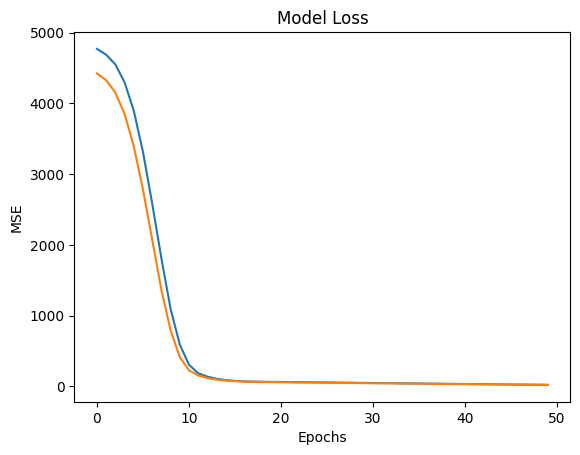

In [30]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model Loss')
plt.show()

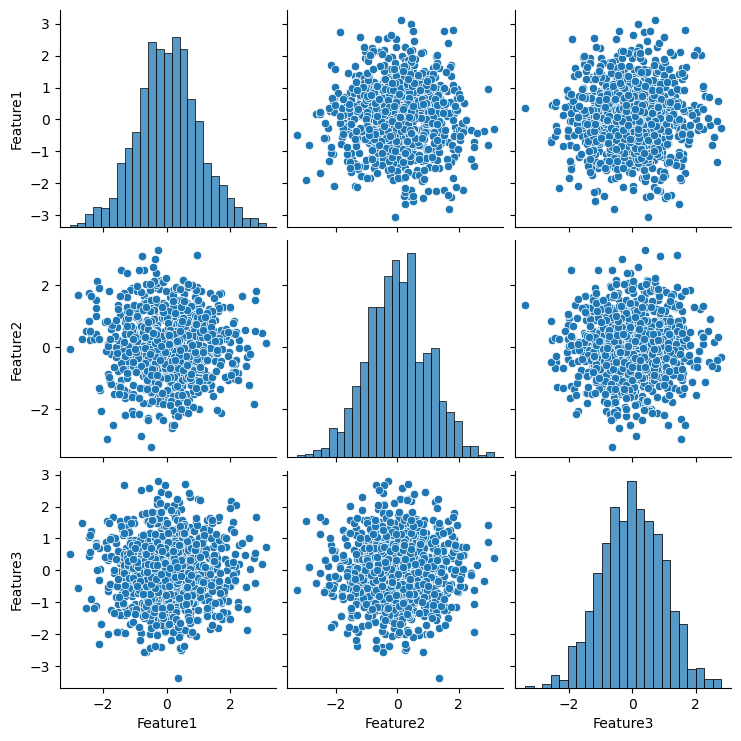

In [16]:
sns.pairplot(data[['Feature1', 'Feature2', 'Feature3']])
plt.show()

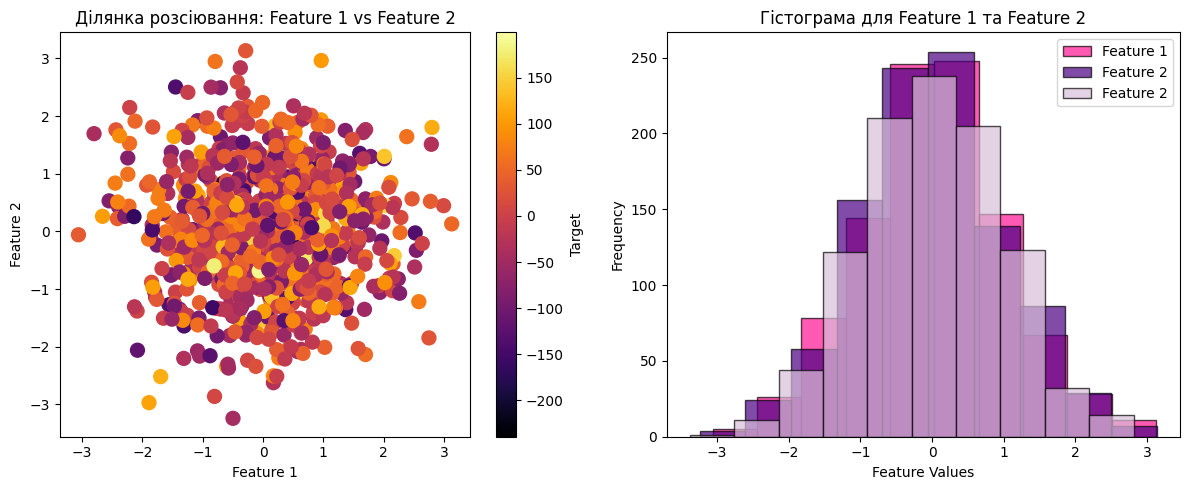

In [31]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(data['Feature1'], data['Feature2'], c=data['Target'], cmap='inferno', s=100)
plt.colorbar(label='Target')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Ділянка розсіювання: Feature 1 vs Feature 2')

plt.subplot(1, 2, 2)
plt.hist(data['Feature1'], bins=10, color='deeppink', alpha=0.7, edgecolor='black', label='Feature 1')
plt.hist(data['Feature2'], bins=10, color='indigo', alpha=0.7, edgecolor='black', label='Feature 2')
plt.hist(data['Feature3'], bins=10, color='thistle', alpha=0.7, edgecolor='black', label='Feature 2')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title('Гістограма для Feature 1 та Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

7/7 [==============================] - 0s 1ms/step


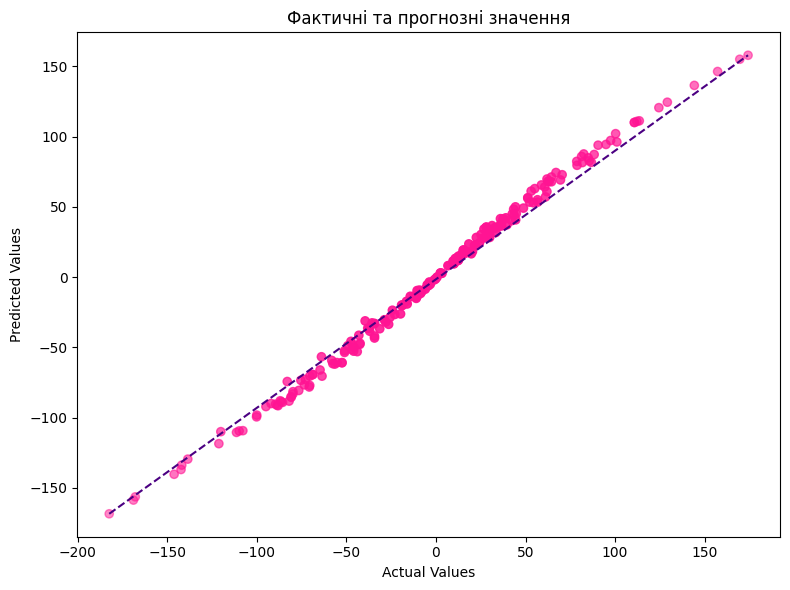

In [32]:
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
distance = np.abs(y_test - y_pred) 
max_distance = np.max(distance)
for i in range(len(y_test)):
    alpha = 1 - (distance[i] / max_distance)
    plt.scatter(y_test[i], y_pred[i], c='deeppink', alpha=alpha)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], ls='--', c ='indigo')
plt.title('Фактичні та прогнозні значення')
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential

# * Класифікація

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2, 
    random_state=56
)

data = pd.DataFrame(X, columns = [f"Feature{i+1}" for i in range(2)])
data['Target'] = y

data.to_csv('binary.csv', index=False)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

train_loss = model.evaluate(X_train, y_train, verbose=0)
print("Втрати (точність) навчання на навчальних даних:", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Втрати (точність) тестових даних на тестових даних:", test_loss)

7/7 [==============================] - 0s 1ms/step
Accuracy: 86.50%
Втрати (точність) навчання на навчальних даних: [0.23534366488456726, 0.8949999809265137]
Втрати (точність) тестових даних на тестових даних: [0.3381797671318054, 0.8650000095367432]


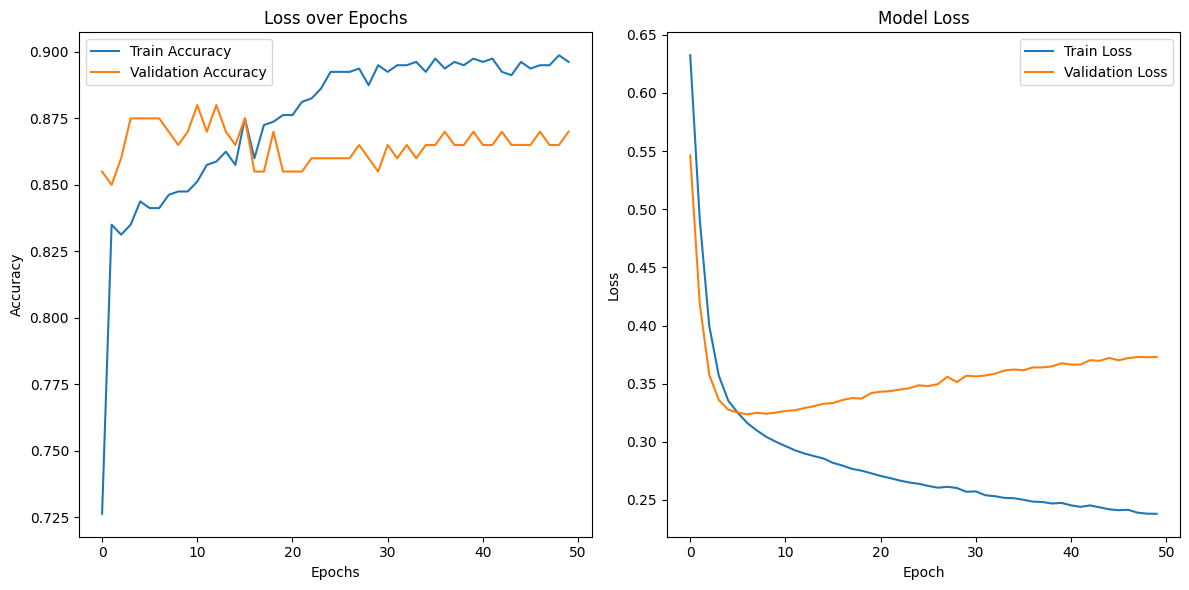

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

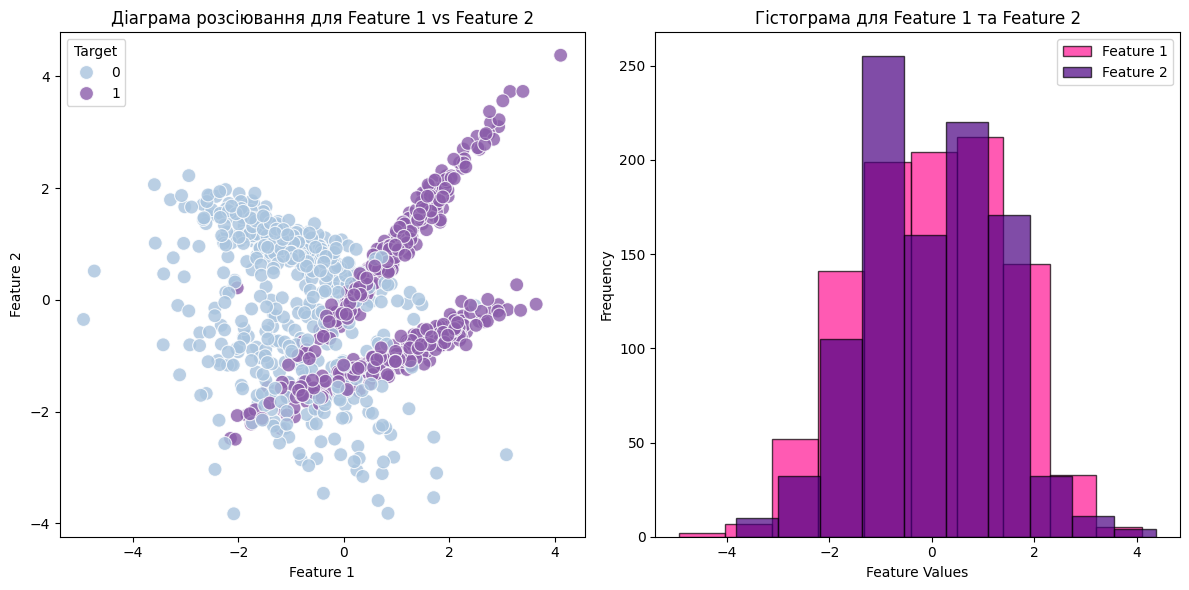

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['Feature1'], y=data['Feature2'], hue=data['Target'], palette='BuPu', s=100, alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Діаграма розсіювання для Feature 1 vs Feature 2')

plt.subplot(1, 2, 2)
plt.hist(data['Feature1'], bins=10, color='deeppink', alpha=0.7, edgecolor='black', label='Feature 1')
plt.hist(data['Feature2'], bins=10, color='indigo', alpha=0.7, edgecolor='black', label='Feature 2')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title('Гістограма для Feature 1 та Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

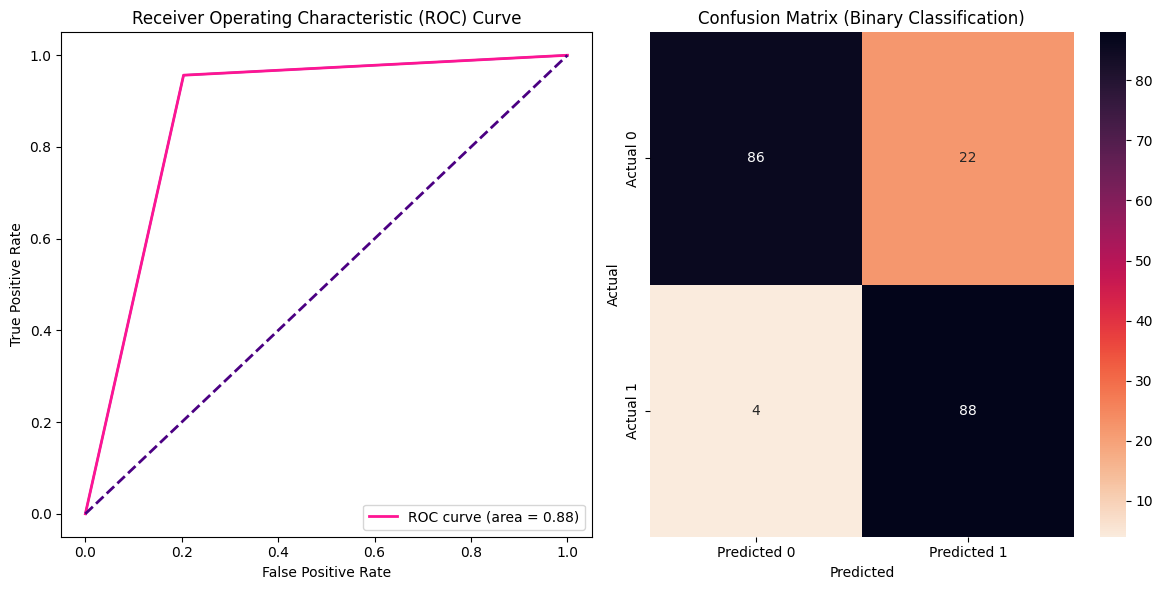

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)

plt.title('Крива робочої характеристики приймача (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color='deeppink', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='indigo', lw=2, linestyle='--')
plt.legend(loc='lower right')

conf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket_r',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Матриця плутанини (бінарна класифікація)')
plt.tight_layout()
plt.show()